<a href="https://colab.research.google.com/github/zackhalepoto/Data_Science_Projects/blob/main/Online_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# Load the data into a pandas DataFrame
df = pd.read_excel('Std_info.xlsx')

In [ ]:
df.head()

,NAME,STD ID,COMPUTER ACCESS,INTERNET ACCESS,CONNECTION QUALITY,GRADES
0,Zainab,02-134201-066,Yes,Yes,Good,A
1,Ahmad,02-134201-067,Yes,Yes,Average,B
2,Fatima,02-134201-068,Yes,Yes,Poor,C
3,Ali,02-134201-069,No,Yes,Good,D
4,Maryam,02-134201-070,No,No,Average,E


In [ ]:
df.isnull().sum()

NAME                   0
STD ID                32
COMPUTER ACCESS       17
INTERNET ACCESS       13
CONNECTION QUALITY    18
GRADES                15
dtype: int64

In [ ]:
df.shape

(409, 6)

In [ ]:
# Impute missing values
df = df.dropna()

In [ ]:
df.shape

(333, 6)

In [ ]:
df.isnull().sum()

NAME                  0
STD ID                0
COMPUTER ACCESS       0
INTERNET ACCESS       0
CONNECTION QUALITY    0
GRADES                0
dtype: int64

In [ ]:
# Convert the categorical variables to dummy variables(eg:0,1,2 for label encoding)
df = pd.get_dummies(df, columns=['COMPUTER ACCESS', 'INTERNET ACCESS', 'CONNECTION QUALITY'])

In [ ]:
df.head()

,NAME,STD ID,GRADES,COMPUTER ACCESS_COMPUTER ACCESS,COMPUTER ACCESS_No,COMPUTER ACCESS_Yes,INTERNET ACCESS_INTERNET ACCESS,INTERNET ACCESS_No,INTERNET ACCESS_Yes,CONNECTION QUALITY_Average,CONNECTION QUALITY_CONNECTION QUALITY,CONNECTION QUALITY_Good,CONNECTION QUALITY_Poor
0,Zainab,02-134201-066,A,0,0,1,0,0,1,0,0,1,0
1,Ahmad,02-134201-067,B,0,0,1,0,0,1,1,0,0,0
2,Fatima,02-134201-068,C,0,0,1,0,0,1,0,0,0,1
3,Ali,02-134201-069,D,0,1,0,0,0,1,0,0,1,0
4,Maryam,02-134201-070,E,0,1,0,0,1,0,1,0,0,0


In [ ]:
# Create a label encoder
le = LabelEncoder()

# Fit the label encoder on the "Grades" column
le.fit(df['GRADES'])

# Transform the "Grades" column to numerical values
df['GRADES'] = le.transform(df['GRADES'])

In [ ]:
# Split the data into predictors (X) and response (y)
X = df.drop(['GRADES', 'NAME', 'STD ID'], axis=1)
y = df['GRADES']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Fit the model on the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)


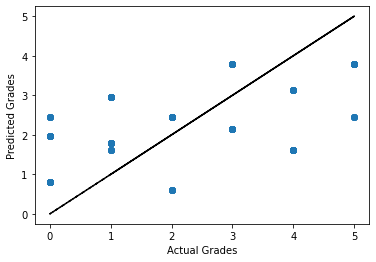

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)

# Add a line of best fit
plt.plot(y_test, y_test, linestyle='dashed', color='black')

# Add axis labels
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')

# Show the plot
plt.show()


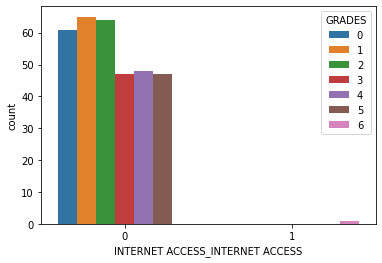

In [ ]:
sns.countplot(data=df, x="INTERNET ACCESS_INTERNET ACCESS", hue="GRADES")

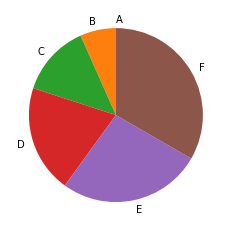

In [ ]:
y = np.array([0, 1, 2, 3, 4, 5])
mylabels = ["A", "B", "C", "D","E","F"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

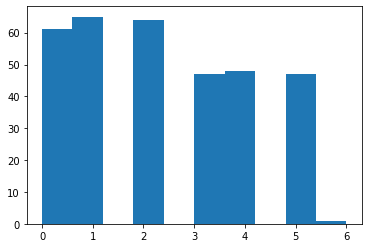

In [ ]:
column = df['GRADES']

plt.hist(column)
plt.show() 

In [ ]:
# log=LogisticRegression()
# log.fit(X_train,y_train)

In [ ]:
# predict = log.predict(X_test)
# predict

In [ ]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'],index = ['row1', 'row2', 'row3', 'row4', 'row5', 'row6'])

,col1,col2,col3,col4,col5,col6
row1,13,0,5,8,0,0
row2,0,16,0,0,13,0
row3,0,0,21,0,0,0
row4,0,0,0,14,0,8
row5,0,6,0,0,14,0
row6,0,0,4,0,0,12


In [ ]:
# print(classification_report(y_test,predict))